In [1]:
import pandas as pd
import seaborn as sns
import ppscore as pps
import pycaret
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
%matplotlib inline


/Users/tddagdas/opt/anaconda3/envs/Main/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('data.csv')

df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [3]:
df = df.rename(columns = {'Unnamed: 0':'first_column'})
df.head()

,first_column,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [4]:
# SELECT VARIABLES WHO ARE CORRELATED 0.12 AND 0.13 WITH Y SINCE THOSE ARE HIGHER SCORES

# X1, X12, X13, X14, X15, X17, X2, X24, X26, X28, X29, X4, X8, X30, X31, X32, X35, X37, X52, X58, X60, X77, X78, X81, 

# X87, X88, X89, X102, X104, X105, X106, X111, X112, X92, X93, X94, X95, X96, X140, X141, X142, X143, X144, X145, X146

# X157, X158, X159, X160, X161, X162, X170, X174

In [5]:
df1 = df[['X1', 'X12', 'X13', 'X14', 'X15', 'X17', 'X2', 'X24', 'X26', 'X28', 'X29', 'X4', 'X8', 'X30', 'X31', 'X32', 'X35', 'X37', 'X52', 'X58', 'X60', 'X77', 'X78', 'X81','X87', 'X88', 'X89', 'X102', 'X104', 'X105', 'X106', 'X111', 'X112', 'X92', 'X93', 'X94', 'X95', 'X96', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145', 'X146','X157', 'X158', 'X159', 'X160', 'X161', 'X162', 'X170', 'X174','y']]

df1.head()

,X1,X12,X13,X14,X15,X17,X2,X24,X26,X28,...,X146,X157,X158,X159,X160,X161,X162,X170,X174,y
0,135,35,64,113,152,127,190,-50,39,48,...,18,-83,-53,-79,-72,-85,-109,-17,-103,4
1,386,258,212,2,-267,-850,382,-152,318,473,...,303,63,63,69,89,123,136,164,157,1
2,-32,-94,-96,-104,-103,-75,-39,-39,-102,-80,...,-68,62,80,66,23,-11,-39,57,-12,5
3,-105,-68,-74,-80,-83,-68,-101,-97,-84,-75,...,-45,-64,-38,-22,-29,-42,-51,-82,-85,5
4,-9,-103,-84,-43,-9,-21,-65,55,73,-13,...,0,9,11,3,-1,-2,4,4,-41,5


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      11500 non-null  int64
 1   X12     11500 non-null  int64
 2   X13     11500 non-null  int64
 3   X14     11500 non-null  int64
 4   X15     11500 non-null  int64
 5   X17     11500 non-null  int64
 6   X2      11500 non-null  int64
 7   X24     11500 non-null  int64
 8   X26     11500 non-null  int64
 9   X28     11500 non-null  int64
 10  X29     11500 non-null  int64
 11  X4      11500 non-null  int64
 12  X8      11500 non-null  int64
 13  X30     11500 non-null  int64
 14  X31     11500 non-null  int64
 15  X32     11500 non-null  int64
 16  X35     11500 non-null  int64
 17  X37     11500 non-null  int64
 18  X52     11500 non-null  int64
 19  X58     11500 non-null  int64
 20  X60     11500 non-null  int64
 21  X77     11500 non-null  int64
 22  X78     11500 non-null  int64
 23  X81     115

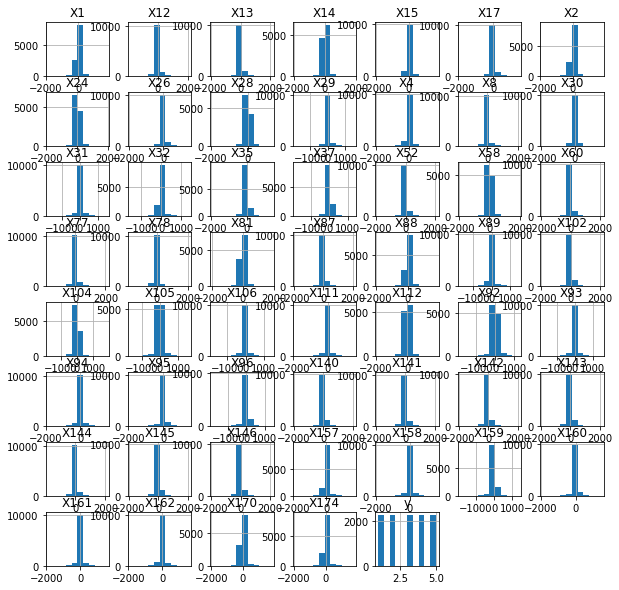

In [7]:
df1.hist(figsize = (10, 10));

In [8]:
X = df1.drop('y',axis=1)
print(X)

        X1  X12  X13  X14  X15  X17   X2  X24  X26  X28  ...  X145  X146  \
0      135   35   64  113  152  127  190  -50   39   48  ...    32    18   
1      386  258  212    2 -267 -850  382 -152  318  473  ...   307   303   
2      -32  -94  -96 -104 -103  -75  -39  -39 -102  -80  ...   -84   -68   
3     -105  -68  -74  -80  -83  -68 -101  -97  -84  -75  ...   -51   -45   
4       -9 -103  -84  -43   -9  -21  -65   55   73  -13  ...    -8     0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
11495  -22  -64  -73  -79  -76  -63  -22  -32  -24  -18  ...    58    54   
11496  -47    8  -66 -132 -180 -227  -11  -88  -21   29  ...    75   165   
11497   14  -10   14   44   77   42    6   66   57  121  ...   -23   -11   
11498  -40    6    1  -28  -37  -35  -25 -147 -147 -112  ...   -97  -118   
11499   29   11   -3   -5   -9    1   41   20    4   -4  ...    39    44   

       X157  X158  X159  X160  X161  X162  X170  X174  
0       -83   -53   -79   -72  

In [9]:
y = df1[['y']]
print(y)

       y
0      4
1      1
2      5
3      5
4      5
...   ..
11495  2
11496  1
11497  5
11498  3
11499  4

[11500 rows x 1 columns]


In [10]:
#figure(figsize=(70,70))

#matrix_df = pps.matrix(df1).pivot(columns='x', index='y',  values='ppscore')

#sns.heatmap(matrix_df, annot=True)

In [11]:
# compare machine learning algorithms on the epileptic seizure dataset
#from pandas import read_csv
from pycaret.classification import setup
from pycaret.classification import compare_models

# define the location of the dataset
#file='data.csv'
# load the dataset
#df = pd.read_csv(file)

# setup the dataset
grid = setup(data=df1, target=df1.columns[-1], html=False, silent=True, verbose=False)
# evaluate models and compare models
best = compare_models()
# report the best model
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.2486,0.5311,0.2489,0.2469,0.2424,0.0607,0.0614,0.493


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.4568,0.7522,0.4578,0.5468,0.4514,0.3209,0.3377,0.258
lr,Logistic Regression,0.2486,0.5311,0.2489,0.2469,0.2424,0.0607,0.0614,0.493


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.4568,0.7522,0.4578,0.5468,0.4514,0.3209,0.3377,0.258
nb,Naive Bayes,0.4253,0.7260,0.4259,0.4282,0.4065,0.2813,0.2929,0.013
lr,Logistic Regression,0.2486,0.5311,0.2489,0.2469,0.2424,0.0607,0.0614,0.493


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.4568,0.7522,0.4578,0.5468,0.4514,0.3209,0.3377,0.258
dt,Decision Tree Classifier,0.4555,0.6595,0.4564,0.4670,0.4600,0.3193,0.3196,0.131
nb,Naive Bayes,0.4253,0.7260,0.4259,0.4282,0.4065,0.2813,0.2929,0.013
lr,Logistic Regression,0.2486,0.5311,0.2489,0.2469,0.2424,0.0607,0.0614,0.493


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.4568,0.7522,0.4578,0.5468,0.4514,0.3209,0.3377,0.258
dt,Decision Tree Classifier,0.4555,0.6595,0.4564,0.4670,0.4600,0.3193,0.3196,0.131
nb,Naive Bayes,0.4253,0.7260,0.4259,0.4282,0.4065,0.2813,0.2929,0.013
lr,Logistic Regression,0.2486,0.5311,0.2489,0.2469,0.2424,0.0607,0.0614,0.493
svm,SVM - Linear Kernel,0.2050,0.0000,0.2053,0.2048,0.2001,0.0065,0.0066,0.103


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.4568,0.7522,0.4578,0.5468,0.4514,0.3209,0.3377,0.258
dt,Decision Tree Classifier,0.4555,0.6595,0.4564,0.4670,0.4600,0.3193,0.3196,0.131
nb,Naive Bayes,0.4253,0.7260,0.4259,0.4282,0.4065,0.2813,0.2929,0.013
lr,Logistic Regression,0.2486,0.5311,0.2489,0.2469,0.2424,0.0607,0.0614,0.493
ridge,Ridge Classifier,0.2359,0.0000,0.2364,0.2268,0.2227,0.0452,0.0460,0.010
svm,SVM - Linear Kernel,0.2050,0.0000,0.2053,0.2048,0.2001,0.0065,0.0066,0.103


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6354,0.8857,0.6363,0.6318,0.6321,0.5442,0.5449,1.002
knn,K Neighbors Classifier,0.4568,0.7522,0.4578,0.5468,0.4514,0.3209,0.3377,0.258
dt,Decision Tree Classifier,0.4555,0.6595,0.4564,0.4670,0.4600,0.3193,0.3196,0.131
nb,Naive Bayes,0.4253,0.7260,0.4259,0.4282,0.4065,0.2813,0.2929,0.013
lr,Logistic Regression,0.2486,0.5311,0.2489,0.2469,0.2424,0.0607,0.0614,0.493
ridge,Ridge Classifier,0.2359,0.0000,0.2364,0.2268,0.2227,0.0452,0.0460,0.010
svm,SVM - Linear Kernel,0.2050,0.0000,0.2053,0.2048,0.2001,0.0065,0.0066,0.103


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.6474,0.8910,0.6482,0.6657,0.6339,0.5593,0.5710,0.020
rf,Random Forest Classifier,0.6354,0.8857,0.6363,0.6318,0.6321,0.5442,0.5449,1.002
knn,K Neighbors Classifier,0.4568,0.7522,0.4578,0.5468,0.4514,0.3209,0.3377,0.258
dt,Decision Tree Classifier,0.4555,0.6595,0.4564,0.4670,0.4600,0.3193,0.3196,0.131
nb,Naive Bayes,0.4253,0.7260,0.4259,0.4282,0.4065,0.2813,0.2929,0.013
lr,Logistic Regression,0.2486,0.5311,0.2489,0.2469,0.2424,0.0607,0.0614,0.493
ridge,Ridge Classifier,0.2359,0.0000,0.2364,0.2268,0.2227,0.0452,0.0460,0.010
svm,SVM - Linear Kernel,0.2050,0.0000,0.2053,0.2048,0.2001,0.0065,0.0066,0.103


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.6474,0.8910,0.6482,0.6657,0.6339,0.5593,0.5710,0.020
rf,Random Forest Classifier,0.6354,0.8857,0.6363,0.6318,0.6321,0.5442,0.5449,1.002
knn,K Neighbors Classifier,0.4568,0.7522,0.4578,0.5468,0.4514,0.3209,0.3377,0.258
dt,Decision Tree Classifier,0.4555,0.6595,0.4564,0.4670,0.4600,0.3193,0.3196,0.131
ada,Ada Boost Classifier,0.4256,0.6553,0.4263,0.3975,0.3671,0.2817,0.3118,0.318
nb,Naive Bayes,0.4253,0.7260,0.4259,0.4282,0.4065,0.2813,0.2929,0.013
lr,Logistic Regression,0.2486,0.5311,0.2489,0.2469,0.2424,0.0607,0.0614,0.493
ridge,Ridge Classifier,0.2359,0.0000,0.2364,0.2268,0.2227,0.0452,0.0460,0.010
svm,SVM - Linear Kernel,0.2050,0.0000,0.2053,0.2048,0.2001,0.0065,0.0066,0.103


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.6474,0.8910,0.6482,0.6657,0.6339,0.5593,0.5710,0.020
rf,Random Forest Classifier,0.6354,0.8857,0.6363,0.6318,0.6321,0.5442,0.5449,1.002
gbc,Gradient Boosting Classifier,0.5813,0.8597,0.5823,0.5825,0.5775,0.4766,0.4789,7.459
knn,K Neighbors Classifier,0.4568,0.7522,0.4578,0.5468,0.4514,0.3209,0.3377,0.258
dt,Decision Tree Classifier,0.4555,0.6595,0.4564,0.4670,0.4600,0.3193,0.3196,0.131
ada,Ada Boost Classifier,0.4256,0.6553,0.4263,0.3975,0.3671,0.2817,0.3118,0.318
nb,Naive Bayes,0.4253,0.7260,0.4259,0.4282,0.4065,0.2813,0.2929,0.013
lr,Logistic Regression,0.2486,0.5311,0.2489,0.2469,0.2424,0.0607,0.0614,0.493
ridge,Ridge Classifier,0.2359,0.0000,0.2364,0.2268,0.2227,0.0452,0.0460,0.010
svm,SVM - Linear Kernel,0.2050,0.0000,0.2053,0.2048,0.2001,0.0065,0.0066,0.103


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.6474,0.8910,0.6482,0.6657,0.6339,0.5593,0.5710,0.020
rf,Random Forest Classifier,0.6354,0.8857,0.6363,0.6318,0.6321,0.5442,0.5449,1.002
gbc,Gradient Boosting Classifier,0.5813,0.8597,0.5823,0.5825,0.5775,0.4766,0.4789,7.459
knn,K Neighbors Classifier,0.4568,0.7522,0.4578,0.5468,0.4514,0.3209,0.3377,0.258
dt,Decision Tree Classifier,0.4555,0.6595,0.4564,0.4670,0.4600,0.3193,0.3196,0.131
ada,Ada Boost Classifier,0.4256,0.6553,0.4263,0.3975,0.3671,0.2817,0.3118,0.318
nb,Naive Bayes,0.4253,0.7260,0.4259,0.4282,0.4065,0.2813,0.2929,0.013
lda,Linear Discriminant Analysis,0.2531,0.5308,0.2533,0.2529,0.2470,0.0663,0.0671,0.027
lr,Logistic Regression,0.2486,0.5311,0.2489,0.2469,0.2424,0.0607,0.0614,0.493
ridge,Ridge Classifier,0.2359,0.0000,0.2364,0.2268,0.2227,0.0452,0.0460,0.010


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.6474,0.8910,0.6482,0.6657,0.6339,0.5593,0.5710,0.020
et,Extra Trees Classifier,0.6470,0.8873,0.6479,0.6479,0.6455,0.5588,0.5598,0.460
rf,Random Forest Classifier,0.6354,0.8857,0.6363,0.6318,0.6321,0.5442,0.5449,1.002
gbc,Gradient Boosting Classifier,0.5813,0.8597,0.5823,0.5825,0.5775,0.4766,0.4789,7.459
knn,K Neighbors Classifier,0.4568,0.7522,0.4578,0.5468,0.4514,0.3209,0.3377,0.258
dt,Decision Tree Classifier,0.4555,0.6595,0.4564,0.4670,0.4600,0.3193,0.3196,0.131
ada,Ada Boost Classifier,0.4256,0.6553,0.4263,0.3975,0.3671,0.2817,0.3118,0.318
nb,Naive Bayes,0.4253,0.7260,0.4259,0.4282,0.4065,0.2813,0.2929,0.013
lda,Linear Discriminant Analysis,0.2531,0.5308,0.2533,0.2529,0.2470,0.0663,0.0671,0.027
lr,Logistic Regression,0.2486,0.5311,0.2489,0.2469,0.2424,0.0607,0.0614,0.493


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.6474,0.8910,0.6482,0.6657,0.6339,0.5593,0.5710,0.020
et,Extra Trees Classifier,0.6470,0.8873,0.6479,0.6479,0.6455,0.5588,0.5598,0.460
rf,Random Forest Classifier,0.6354,0.8857,0.6363,0.6318,0.6321,0.5442,0.5449,1.002
gbc,Gradient Boosting Classifier,0.5813,0.8597,0.5823,0.5825,0.5775,0.4766,0.4789,7.459
knn,K Neighbors Classifier,0.4568,0.7522,0.4578,0.5468,0.4514,0.3209,0.3377,0.258
dt,Decision Tree Classifier,0.4555,0.6595,0.4564,0.4670,0.4600,0.3193,0.3196,0.131
ada,Ada Boost Classifier,0.4256,0.6553,0.4263,0.3975,0.3671,0.2817,0.3118,0.318
nb,Naive Bayes,0.4253,0.7260,0.4259,0.4282,0.4065,0.2813,0.2929,0.013
lda,Linear Discriminant Analysis,0.2531,0.5308,0.2533,0.2529,0.2470,0.0663,0.0671,0.027
lr,Logistic Regression,0.2486,0.5311,0.2489,0.2469,0.2424,0.0607,0.0614,0.493


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6550,0.8951,0.6558,0.6566,0.6545,0.5687,0.5694,0.899
qda,Quadratic Discriminant Analysis,0.6474,0.8910,0.6482,0.6657,0.6339,0.5593,0.5710,0.020
et,Extra Trees Classifier,0.6470,0.8873,0.6479,0.6479,0.6455,0.5588,0.5598,0.460
rf,Random Forest Classifier,0.6354,0.8857,0.6363,0.6318,0.6321,0.5442,0.5449,1.002
gbc,Gradient Boosting Classifier,0.5813,0.8597,0.5823,0.5825,0.5775,0.4766,0.4789,7.459
knn,K Neighbors Classifier,0.4568,0.7522,0.4578,0.5468,0.4514,0.3209,0.3377,0.258
dt,Decision Tree Classifier,0.4555,0.6595,0.4564,0.4670,0.4600,0.3193,0.3196,0.131
ada,Ada Boost Classifier,0.4256,0.6553,0.4263,0.3975,0.3671,0.2817,0.3118,0.318
nb,Naive Bayes,0.4253,0.7260,0.4259,0.4282,0.4065,0.2813,0.2929,0.013
lda,Linear Discriminant Analysis,0.2531,0.5308,0.2533,0.2529,0.2470,0.0663,0.0671,0.027


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.6687,0.9091,0.6694,0.6716,0.6696,0.5858,0.5861,17.169
lightgbm,Light Gradient Boosting Machine,0.6550,0.8951,0.6558,0.6566,0.6545,0.5687,0.5694,0.899
qda,Quadratic Discriminant Analysis,0.6474,0.8910,0.6482,0.6657,0.6339,0.5593,0.5710,0.020
et,Extra Trees Classifier,0.6470,0.8873,0.6479,0.6479,0.6455,0.5588,0.5598,0.460
rf,Random Forest Classifier,0.6354,0.8857,0.6363,0.6318,0.6321,0.5442,0.5449,1.002
gbc,Gradient Boosting Classifier,0.5813,0.8597,0.5823,0.5825,0.5775,0.4766,0.4789,7.459
knn,K Neighbors Classifier,0.4568,0.7522,0.4578,0.5468,0.4514,0.3209,0.3377,0.258
dt,Decision Tree Classifier,0.4555,0.6595,0.4564,0.4670,0.4600,0.3193,0.3196,0.131
ada,Ada Boost Classifier,0.4256,0.6553,0.4263,0.3975,0.3671,0.2817,0.3118,0.318
nb,Naive Bayes,0.4253,0.7260,0.4259,0.4282,0.4065,0.2813,0.2929,0.013


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.6687,0.9091,0.6694,0.6716,0.6696,0.5858,0.5861,17.169
lightgbm,Light Gradient Boosting Machine,0.6550,0.8951,0.6558,0.6566,0.6545,0.5687,0.5694,0.899
qda,Quadratic Discriminant Analysis,0.6474,0.8910,0.6482,0.6657,0.6339,0.5593,0.5710,0.020
et,Extra Trees Classifier,0.6470,0.8873,0.6479,0.6479,0.6455,0.5588,0.5598,0.460
rf,Random Forest Classifier,0.6354,0.8857,0.6363,0.6318,0.6321,0.5442,0.5449,1.002
gbc,Gradient Boosting Classifier,0.5813,0.8597,0.5823,0.5825,0.5775,0.4766,0.4789,7.459
knn,K Neighbors Classifier,0.4568,0.7522,0.4578,0.5468,0.4514,0.3209,0.3377,0.258
dt,Decision Tree Classifier,0.4555,0.6595,0.4564,0.4670,0.4600,0.3193,0.3196,0.131
ada,Ada Boost Classifier,0.4256,0.6553,0.4263,0.3975,0.3671,0.2817,0.3118,0.318
nb,Naive Bayes,0.4253,0.7260,0.4259,0.4282,0.4065,0.2813,0.2929,0.013


In [12]:
# tune model hyperparameters on the sonar classification dataset
#from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
#from pycaret.classification import setup
from pycaret.classification import tune_model

# define the location of the dataset
#file='data.csv'
# load the dataset
#df = pd.read_csv(file)

# setup the dataset
grid = setup(data=df1, target=df1.columns[-1], html=False, silent=True, verbose=False)
# tune model hyperparameters
best = tune_model(ExtraTreesClassifier(), n_iter=200, choose_better=True)
# report the best model
print(best)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  4.6min finished


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5068,0.8112,0.5073,0.5474,0.4620,0.3833,0.4288
1,0.5242,0.8144,0.5254,0.5857,0.4900,0.4055,0.4455
2,0.5068,0.8156,0.5083,0.5380,0.4627,0.3838,0.4232
3,0.5354,0.8158,0.5366,0.5477,0.4894,0.4194,0.4584
4,0.5329,0.8276,0.5344,0.6193,0.4959,0.4164,0.4600
5,0.5280,0.8158,0.5294,0.5863,0.4925,0.4102,0.4469
6,0.5540,0.8330,0.5555,0.6113,0.5153,0.4428,0.4817
7,0.5155,0.8142,0.5168,0.5663,0.4780,0.3946,0.4292
8,0.5280,0.8236,0.5292,0.5784,0.4929,0.4101,0.4447
9,0.5398,0.8206,0.5411,0.6251,0.5104,0.4249,0.4597


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
